# Perturbation Exercises

Natasha Watkins

## Exercise 2

In [1]:
α = 0.33
k = 5
z = 1
b = 2
t = 0.1
h = 24

In [2]:
from scipy.optimize import fsolve
import numpy as np
import matplotlib.pyplot as plt

def equilibrium(w, z, k, t, h, b, α):
    
    n_d = k * (((1 - α) * z) / w)**(1 / α)
    π = z * k**α * n_d**(1 - α) - w * n_d
    n_s = h - (b / (w * (1 + b))) * (w * h + π - t)
        
    return n_s - n_d

Equilibrium wage is...

In [3]:
fsolve(equilibrium, 0.5, args=(z, k, t, h, b, α))

array([0.62736178])

In [4]:
def w(k):  
    return fsolve(equilibrium, 0.5, args=(z, k, t, h, b, α))

In [5]:
def f_prime(f, x0, ɛ=1e-3):
    return (f(x0 + ɛ) - f(x0 - ɛ)) / (2 * ɛ)

In [6]:
def f_prime2(f, x0, ɛ=1e-3):
    return (f(x0 + ɛ) - 2 * f(x0) + f(x0 - ɛ)) / (ɛ**2) 

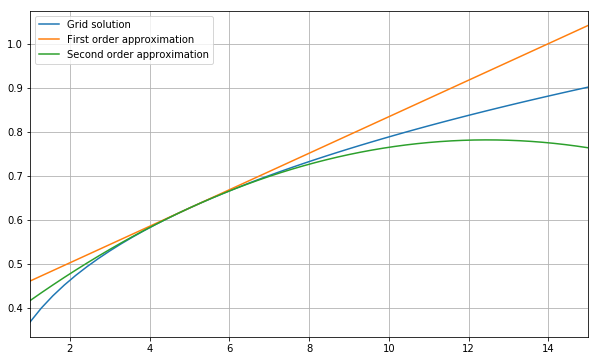

In [7]:
k0 = 5  # Approximate around k=5
k_grid = np.linspace(1, 15)
w_approx = w(k0) + f_prime(w, k0) * (k_grid - k0)
w_approx2 = w(k0) + f_prime(w, k0) * (k_grid - k0 ) + 0.5 * f_prime2(w, k0) * (k_grid - k0)**2
w_grid = np.empty_like(k_grid)

for i, k in enumerate(k_grid):
    w_grid[i] = w(k)

plt.figure(figsize=(10, 6))
plt.plot(k_grid, w_grid, label='Grid solution')
plt.plot(k_grid, w_approx, label='First order approximation')
plt.plot(k_grid, w_approx2, label='Second order approximation')
plt.legend()
plt.xlim(1, 15)
plt.grid()
plt.show()

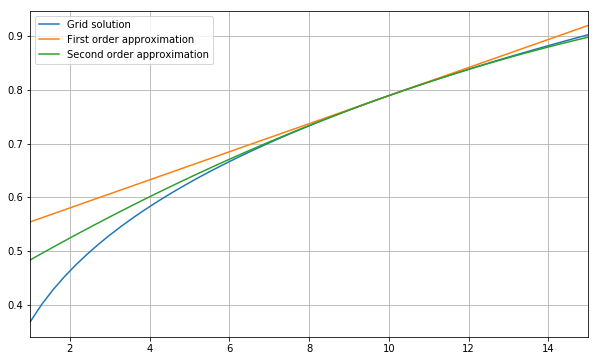

In [8]:
k0 = 10  # Approximate around k=10
k_grid = np.linspace(1, 15)
w_approx = w(k0) + f_prime(w, k0) * (k_grid - k0)
w_approx2 = w(k0) + f_prime(w, k0) * (k_grid - k0 ) + 0.5 * f_prime2(w, k0) * (k_grid - k0)**2

plt.figure(figsize=(10, 6))
plt.plot(k_grid, w_grid, label='Grid solution')
plt.plot(k_grid, w_approx, label='First order approximation')
plt.plot(k_grid, w_approx2, label='Second order approximation')
plt.legend()
plt.xlim(1, 15)
plt.grid()
plt.show()

## Exercise 3

In [9]:
def f_prime3(f, x0, ɛ=1e-3):
    return (f(x0 + 2 * ɛ) - 2 * f(x0 + ɛ) + 2 * f(x0 - ɛ) - f(x0 - 2 * ɛ)) / (2 * ɛ**3)

In [10]:
F = lambda y, x: (x**0.35 + 0.9 * x - y)**(-2.5) - 0.95 * (y**0.35 + 0.9 * y)**(-2.5)

def y(x):
    return fsolve(F, 50, args=(x))

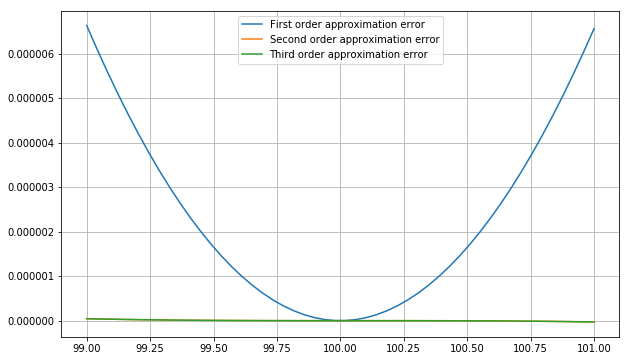

In [11]:
x0 = 100
x_grid = np.linspace(99, 101)
y_approx = y(x0) + f_prime(y, x0) * (x_grid - x0)
y_approx2 = y(x0) + f_prime(y, x0) * (x_grid - x0) + 0.5 * f_prime2(y, x0) * (x_grid - x0)**2
y_approx3 = y(x0) + f_prime(y, x0) * (x_grid - x0) + 0.5 * f_prime2(y, x0) * (x_grid - x0)**2 + \
            (1 / 6) * f_prime3(y, x0) * (x_grid - x0)**3

y_grid = np.empty_like(x_grid)
for i, x in enumerate(x_grid):
    y_grid[i] = y(x)

plt.figure(figsize=(10, 6))
plt.plot(x_grid, y_approx - y_grid, label='First order approximation error')
plt.plot(x_grid, y_approx2 - y_grid, label='Second order approximation error')
plt.plot(x_grid, y_approx3 - y_grid, label='Third order approximation error')
plt.legend()
plt.grid()
plt.show()

## Exercise 4

In [31]:
def H(K):
    return (α**2 * K**(2 * (α - 1))) / (K**α - K)

In [35]:
def H_primeK(K):
    return 2 * (α - 1) * K**(2 * α - 1) * (K**α - K) - (α * K**(α - 1) - 1) *\
    (α**2 * K**(2 * (α - 1))) / (K**α - K)**2

In [42]:
K0 = 5
K_grid = np.linspace(4, 7)

K_first_order = H(K0) + H_primeK(K0) * (K_grid - K0)

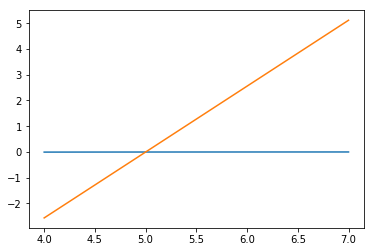

In [45]:
plt.plot(K_grid, H(K_grid))
plt.plot(K_grid, K_first_order)
plt.show()